# Results figures

In [3]:
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt

General function for pre-processing results

In [4]:
def get_results(tp_fn, tf_fn):
    with open(tp_fn, 'rb') as f:
        tp_results = pickle.load(f)
    with open(tf_fn, 'rb') as f:
        tf_results = pickle.load(f)
    
    # Shared data across TP and TF
    src_filt_names = [k for k in tp_results[('encoder','queries')][0][0].keys()]
    diff_names = [k for k in list(tp_results[('encoder','queries')][0][0].values())[0].keys()]

    src_f2i = {filt_name:i for i,filt_name in enumerate(src_filt_names)}
    d2i = {diff_name:i for i,diff_name in enumerate(diff_names)}

    n_layers = len(tp_results[('encoder','queries')])
    n_heads = len(tp_results[('encoder','queries')][0])
    n_src_filters = len(src_filt_names)
    n_diffs = len(diff_names)
    
    # Put TP results into one tensor
    tp_rep_types = [k for k in tp_results.keys()]
    tp_r2i = {rep_type:i for i,rep_type in enumerate(tp_rep_types)}
    tp_n_rep_types = len(tp_rep_types)

    tp_max_results = np.zeros([tp_n_rep_types, n_layers, n_src_filters, n_diffs])
    tp_min_results = np.zeros([tp_n_rep_types, n_layers, n_src_filters, n_diffs])
    tp_mean_results = np.zeros([tp_n_rep_types, n_layers, n_src_filters, n_diffs])

    for r_i, rep_type in enumerate(tp_rep_types):
        n_h = n_heads if rep_type[-1] not in ['feedforward', 'mha_res', 'ff_res'] else 1
        filt_names = src_filt_names
        for l_i in range(n_layers):
            for f_i, filt_name in enumerate(filt_names):
                    for d_i, diff_name in enumerate(diff_names):
                        head_results = []
                        for h_i in range(n_h):
                            r, p = tp_results[rep_type][l_i][h_i][filt_name][diff_name]
                            if np.isnan(r):
                                r = 0
                            head_results.append(r)
                        r_mean = np.mean(head_results)
                        tp_mean_results[r_i,l_i,f_i,d_i] = r_mean
                        r_max = np.max(head_results)
                        tp_max_results[r_i,l_i,f_i,d_i] = r_max
                        r_min = np.min(head_results)
                        tp_min_results[r_i,l_i,f_i,d_i] = r_min
    
    # Put TF results into one tensor
    tf_rep_types = [k for k in tf_results.keys()]
    tf_r2i = {rep_type:i for i,rep_type in enumerate(tf_rep_types)}
    tf_n_rep_types = len(tf_rep_types)

    tf_max_results = np.zeros([tf_n_rep_types, n_layers, n_src_filters, n_diffs])
    tf_min_results = np.zeros([tf_n_rep_types, n_layers, n_src_filters, n_diffs])
    tf_mean_results = np.zeros([tf_n_rep_types, n_layers, n_src_filters, n_diffs])

    for r_i, rep_type in enumerate(tf_rep_types):
        n_h = n_heads if rep_type[-1] not in ['feedforward', 'mha_res', 'ff_res'] else 1
        filt_names = src_filt_names
        for l_i in range(n_layers):
            for f_i, filt_name in enumerate(filt_names):
                    for d_i, diff_name in enumerate(diff_names):
                        head_results = []
                        for h_i in range(n_h):
                            r, p = tf_results[rep_type][l_i][h_i][filt_name][diff_name]
                            if np.isnan(r):
                                r = 0
                            head_results.append(r)
                        r_mean = np.mean(head_results)
                        tf_mean_results[r_i,l_i,f_i,d_i] = r_mean
                        r_max = np.max(head_results)
                        tf_max_results[r_i,l_i,f_i,d_i] = r_max
                        r_min = np.min(head_results)
                        tf_min_results[r_i,l_i,f_i,d_i] = r_min
    
    results = {'src_filt_names': src_filt_names,
               'diff_names': diff_names,
               'src_f2i': src_f2i,
               'd2i': d2i,
               'n_layers': n_layers,
               'n_heads': n_heads,
               'n_src_filters': n_src_filters,
               'n_diffs': n_diffs,
               'tp_rep_types': tp_rep_types,
               'tp_r2i': tp_r2i,
               'tp_n_rep_types': tp_n_rep_types,
               'tf_rep_types': tf_rep_types,
               'tf_r2i': tf_r2i,
               'tf_n_rep_types': tf_n_rep_types,
               'tp_max': tp_max_results,
               'tp_min': tp_min_results,
               'tp_mean': tp_mean_results,
               'tf_max': tf_max_results,
               'tf_min': tf_min_results,
               'tf_mean': tf_mean_results}
    return results
                    
        

General variables

In [5]:
tp_path = '../results/results_TP_'
tf_path = '../results/results_TF_'

## Figure 2B

adddivadd filter by operator (just TP-Transformer)

Preprocess all results

In [6]:
# File names
custom_name = 'custom_adddivadd.P'
tp_fn = tp_path + custom_name
tf_fn = tp_path + custom_name

# Preprocess
results = get_results(tp_fn, tf_fn)

Get results of interest

In [7]:
module = 'encoder'
tp_rep_type = 'queries'
layers = [i for i in range(0,6)]
diff_names = ['diff_sum1', 'diff_div', 'diff_sum2']
diff_legend = [r'value of $x_1 + x_2$', r'value of $\frac{x_1 + x_2}{x_3}$', r'value of $\frac{x_1 + x_2}{x_3} + x_4$']
src_filts = ['plus1', 'div', 'plus2']
src_filt_names = ['+', '/', '+']

In [8]:
tp_min = results['tp_min']
tp_mean = results['tp_mean']
tp_max = results['tp_max']

# Representation type
tp_r_i = results['tp_r2i'][(module, tp_rep_type)]
tp_min = tp_min[tp_r_i,:,:,:] # [n_layers, n_filters, n_diffs]
tp_mean = tp_mean[tp_r_i,:,:,:] # [n_layers, n_filters, n_diffs]
tp_max = tp_max[tp_r_i,:,:,:] # [n_layers, n_filters, n_diffs]

# Layers
tp_min = tp_min[layers,:,:]
tp_mean = tp_mean[layers,:,:]
tp_max = tp_max[layers,:,:]

# Differences
diff_ids = [results['d2i'][diff_name] for diff_name in diff_names]
tp_min = tp_min[:,:,diff_ids]
tp_mean = tp_mean[:,:,diff_ids]
tp_max = tp_max[:,:,diff_ids]

Plot

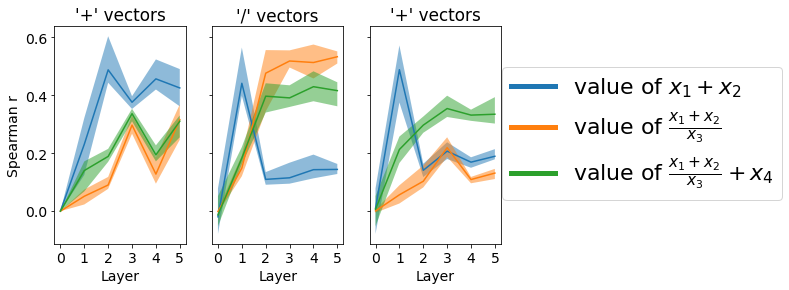

In [9]:
# Plot
matplotlib.rcParams.update({'font.size': 14})
n_filts = len(src_filts)
fig, axs = plt.subplots(1,n_filts, sharex=True, sharey=True,  figsize=(8,4))

for ax_idx, (src_filt, src_filt_name) in enumerate(zip(src_filts, src_filt_names)):
    # Filter
    src_f_i = results['src_f2i'][src_filt]
    tp_min_mat = tp_min[:,src_f_i,:]
    tp_mean_mat = tp_mean[:,src_f_i,:]
    tp_max_mat = tp_max[:,src_f_i,:]

    # Plot lines and ranges 
    axs[ax_idx].plot(tp_mean_mat[:,:])
    for i in range(tp_mean_mat.shape[1]):
        axs[ax_idx].fill_between(np.arange(6), tp_min_mat[:,i], tp_max_mat[:,i], 
                         alpha=0.5)
    
    #axs[ax_idx].set_ylim([-0.05, 1.05])
    title = "'{}' vectors".format(src_filt_name)
    axs[ax_idx].set_title(title)
    axs[ax_idx].set_xticks(range(len(layers)))
    axs[ax_idx].set_xticklabels(layers)
    axs[ax_idx].set_xlabel("Layer")

    if ax_idx == 0:
        axs[ax_idx].set_ylabel('Spearman r')
        axs[ax_idx].set_ylabel('Spearman r')

leg = plt.legend(diff_legend, loc=[1.01, 0.2], fontsize=22)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("adddivadd_ops.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

### Figure 2D

Preprocess all results

In [10]:
# File names
custom_name = 'custom_adddiv2.P'
tp_fn = tp_path + custom_name
tf_fn = tp_path + custom_name

# Preprocess
results = get_results(tp_fn, tf_fn)

Get results of interest

In [11]:
module = 'encoder'
tp_rep_type = 'queries'
layer = 5
layers = [i for i in range(0,6)]
diff_names = ['diff_term1_sum', 'diff_term1_div', 
               'diff_term2_sum', 'diff_term2_div',
               'diff_sum']
diff_legend = [r'value of $x_1 + x_2$', r'value of $\frac{x_1 + x_2}{x_3}$',
               r'value of $x_4 + x_5$', r'value of $\frac{x_4 + x_5}{x_6}$',
               r'value of $\frac{x_1 + x_2}{x_3} + \frac{x_4 + x_5}{x_6}$']
src_filts = ['p{}'.format(i) for i in range(23)]
src_filt_names = ['<sos>', r'$($', r'$x_1$', '_', r'$+$', '_', r'$x_2$', r'$)$', r'$/$', r'$x_3$', 
                  '_', r'$+$', '_', 
                  r'$($', r'$x_4$', '_', r'$+$', '_', r'$x_5$', r'$)$', r'$/$', r'$x_6$', '<eos>']

In [12]:
tp_min = results['tp_min']
tp_mean = results['tp_mean']
tp_max = results['tp_max']

tp_r_i = results['tp_r2i'][(module, tp_rep_type)]
tp_min = tp_min[tp_r_i,:,:,:] # [n_layers, n_filters, n_diffs]
tp_mean = tp_mean[tp_r_i,:,:,:] # [n_layers, n_filters, n_diffs]
tp_max = tp_max[tp_r_i,:,:,:] # [n_layers, n_filters, n_diffs]

In [13]:
tp_min = results['tp_min']
tp_mean = results['tp_mean']
tp_max = results['tp_max']

# Representation type
tp_r_i = results['tp_r2i'][(module, tp_rep_type)]
tp_min = tp_min[tp_r_i,:,:,:] # [n_layers, n_filters, n_diffs]
tp_mean = tp_mean[tp_r_i,:,:,:] # [n_layers, n_filters, n_diffs]
tp_max = tp_max[tp_r_i,:,:,:] # [n_layers, n_filters, n_diffs]

# Layers
tp_min = tp_min[layer,:,:] # [n_filters, n_diffs]
tp_mean = tp_mean[layer,:,:] # [n_filters, n_diffs] 
tp_max = tp_max[layer,:,:] # [n_filters, n_diffs]

# Filters
filt_ids = [results['src_f2i'][src_filt] for src_filt in src_filts]
tp_min = tp_min[filt_ids,:]
tp_mean = tp_mean[filt_ids,:]
tp_max = tp_max[filt_ids,:]


# Differences
diff_ids = [results['d2i'][diff_name] for diff_name in diff_names]
tp_min = tp_min[:,diff_ids]
tp_mean = tp_mean[:,diff_ids]
tp_max = tp_max[:,diff_ids]


Plot

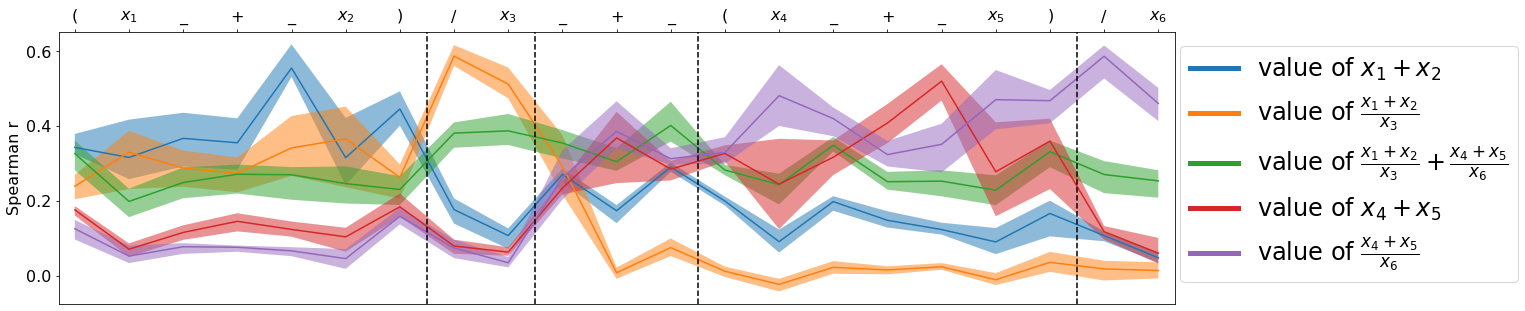

In [14]:
n_chars = len(src_filts)
n_diffs = len(diff_names)
space = 0.3
width = (1-space)/n_diffs
x = np.arange(n_chars-2)

# Lines and ranges
matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1, figsize=[20,5])
for diff_i in [0,1,4,2,3]:
    ax.plot(x, tp_mean[1:-1,diff_i])
    ax.fill_between(x, tp_min[1:-1,diff_i], tp_max[1:-1,diff_i], 
                         alpha=0.5)

# Vertical lines
#ax.axvline(x=-0.5, color='k', linestyle='--')
ax.axvline(x=6.5, color='k', linestyle='--')
ax.axvline(x=8.5, color='k', linestyle='--')
ax.axvline(x=11.5, color='k', linestyle='--')
ax.axvline(x=18.5, color='k', linestyle='--')
#ax.axvline(x=20.5, color='k', linestyle='--')

# Axes and labels
#ax.set_title("All vectors")
ax.set_xlim([-0.3,n_chars-2.7])
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set_xticks(np.arange(0,n_chars-2))
ax.set_xticklabels(src_filt_names[1:-1])
#ax.set_xlabel("Input sequence")
#ax.set_ylim([-0.1, 1.0])
ax.set_ylabel("Spearman r")

# Legend
legend_labels = [diff_legend[i] for i in [0,1,4,2,3]]
matplotlib.rcParams.update({'font.size': 24})
leg = ax.legend(legend_labels, bbox_to_anchor=(1.005, 0.95), loc=2, borderaxespad=0.)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)

plt.savefig("adddiv2_all.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

### Table 1

Spearman r and p values for each operator in each of the six question types

In [15]:
def get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name):
    with open(tp_fn, 'rb') as f:
        tp_results = pickle.load(f)
    with open(tf_fn, 'rb') as f:
        tf_results = pickle.load(f)
        
    tp_r, tp_p = tp_results[rep_type][l_i][h_i][filt_name][diff_name]
    tf_r, tf_p = tf_results[rep_type][l_i][h_i][filt_name][diff_name]
    
    tp_r = round(tp_r, 3)
    tp_p = round(tp_p, 3)
    tf_r = round(tf_r, 3)
    tf_p = round(tf_p, 3)
    
    print("TP:  Spearman r: {}, p-value: {}".format(tp_r, tp_p))
    print("TF:  Spearman r: {}, p-value: {}".format(tf_r, tf_p))

Representation type, layer, head

In [16]:
rep_type = ('encoder', 'queries')
l_i = 5
h_i = 0

#### Adddiv 

In [17]:
custom_name = 'custom_adddiv.P'
tp_fn = tp_path + custom_name
tf_fn = tf_path + custom_name

In [18]:
filt_name = 'plus'
diff_name = 'diff_sums'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.315, p-value: 0.0
TF:  Spearman r: 0.453, p-value: 0.0


In [19]:
filt_name = 'div'
diff_name = 'diff_y'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.565, p-value: 0.0
TF:  Spearman r: 0.539, p-value: 0.0


#### Muldiv

In [20]:
custom_name = 'custom_muldiv.P'
tp_fn = tp_path + custom_name
tf_fn = tf_path + custom_name

In [21]:
filt_name = 'mul_num'
diff_name = 'diff_mul_num'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.479, p-value: 0.0
TF:  Spearman r: 0.612, p-value: 0.0


In [22]:
filt_name = 'mul_den'
diff_name = 'diff_mul_den'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.662, p-value: 0.0
TF:  Spearman r: 0.654, p-value: 0.0


In [23]:
filt_name = 'div'
diff_name = 'diff_div'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.59, p-value: 0.0
TF:  Spearman r: 0.536, p-value: 0.0


#### Addmul

In [24]:
custom_name = 'custom_addmul.P'
tp_fn = tp_path + custom_name
tf_fn = tf_path + custom_name

In [25]:
filt_name = 'mul'
diff_name = 'diff_mul'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.132, p-value: 0.0
TF:  Spearman r: 0.251, p-value: 0.0


In [26]:
filt_name = 'plus'
diff_name = 'diff_sum'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.502, p-value: 0.0
TF:  Spearman r: 0.381, p-value: 0.0


#### Addmuldiv

In [27]:
custom_name = 'custom_addmuldiv.P'
tp_fn = tp_path + custom_name
tf_fn = tf_path + custom_name

In [28]:
filt_name = 'mul'
diff_name = 'diff_mul'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.141, p-value: 0.0
TF:  Spearman r: 0.297, p-value: 0.0


In [29]:
filt_name = 'plus'
diff_name = 'diff_sum'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.159, p-value: 0.0
TF:  Spearman r: 0.174, p-value: 0.0


In [30]:
filt_name = 'div'
diff_name = 'diff_div'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.147, p-value: 0.0
TF:  Spearman r: 0.171, p-value: 0.0


#### Adddivadd

In [31]:
custom_name = 'custom_adddivadd.P'
tp_fn = tp_path + custom_name
tf_fn = tf_path + custom_name

In [32]:
diff_names = ['diff_sum1', 'diff_div', 'diff_sum2']
src_filts = ['plus1', 'div', 'plus2']

In [33]:
filt_name = 'plus1'
diff_name = 'diff_sum1'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.424, p-value: 0.0
TF:  Spearman r: 0.423, p-value: 0.0


In [34]:
filt_name = 'div'
diff_name = 'diff_div'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.51, p-value: 0.0
TF:  Spearman r: 0.459, p-value: 0.0


In [35]:
filt_name = 'plus2'
diff_name = 'diff_sum2'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.353, p-value: 0.0
TF:  Spearman r: 0.411, p-value: 0.0


#### Adddiv2

In [36]:
custom_name = 'custom_adddiv2.P'
tp_fn = tp_path + custom_name
tf_fn = tf_path + custom_name

In [37]:
filt_name = 'term1_plus'
diff_name = 'diff_term1_sum'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.374, p-value: 0.0
TF:  Spearman r: 0.364, p-value: 0.0


In [38]:
filt_name = 'term1_div'
diff_name = 'diff_term1_div'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.577, p-value: 0.0
TF:  Spearman r: 0.482, p-value: 0.0


In [39]:
filt_name = 'term2_plus'
diff_name = 'diff_term2_sum'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.401, p-value: 0.0
TF:  Spearman r: 0.442, p-value: 0.0


In [40]:
filt_name = 'term2_div'
diff_name = 'diff_term2_div'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.528, p-value: 0.0
TF:  Spearman r: 0.503, p-value: 0.0


In [41]:
filt_name = 'plus'
diff_name = 'diff_sum'
get_r_and_p(tp_fn, tf_fn, rep_type, l_i, h_i, filt_name, diff_name)

TP:  Spearman r: 0.301, p-value: 0.0
TF:  Spearman r: 0.389, p-value: 0.0
